## **Processing including 1. data mosaic and subseting, 2. datum transform, 3. image alignment**


### 1. Data mosaic, subseting, up-sampleing for **tandem image**$

In [1]:
import os
os.chdir('..')
from notebooks import config
import numpy as np
import glob
from utils.geotif_io import readTiff, writeTiff
import matplotlib.pyplot as plt
from utils.crop_to_extent import crop_to_extent


In [2]:
tiles_name = ['TDM1_DEM__30_N34E080_V01_C', 'TDM1_DEM__30_N34E081_V01_C',\
              'TDM1_DEM__30_N35E080_V01_C','TDM1_DEM__30_N35E081_V01_C']
paths_tandem = [glob.glob(config.root_proj + '/data/dem/tandem-x/' + tile_name + '/DEM/*DEM.tif')[0] 
                for tile_name in tiles_name]
path_tandem_mosaic = config.root_proj + '/data/dem/tandem-x/tandem_mosaic.tif'
print(paths_tandem)


['/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/tandem-x/TDM1_DEM__30_N34E080_V01_C/DEM/TDM1_DEM__30_N34E080_DEM.tif', '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/tandem-x/TDM1_DEM__30_N34E081_V01_C/DEM/TDM1_DEM__30_N34E081_DEM.tif', '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/tandem-x/TDM1_DEM__30_N35E080_V01_C/DEM/TDM1_DEM__30_N35E080_DEM.tif', '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/tandem-x/TDM1_DEM__30_N35E081_V01_C/DEM/TDM1_DEM__30_N35E081_DEM.tif']


In [3]:
out_path_tmp = 'out.tif'

for i, path_tandem in enumerate(paths_tandem):
    print('merge ->', path_tandem.split('/')[-1])
    if i == 0:
      !gdal_merge.py -init 0 -o $path_tandem_mosaic $path_tandem $path_tandem
      !mv $path_tandem_mosaic $out_path_tmp   # rename 
    else:
      !gdal_merge.py -init 0 -o $path_tandem_mosaic $out_path_tmp $path_tandem
      if i <len(paths_tandem)-1:
        !mv $path_tandem_mosaic $out_path_tmp  # rename



merge -> TDM1_DEM__30_N34E080_DEM.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> TDM1_DEM__30_N34E081_DEM.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> TDM1_DEM__30_N35E080_DEM.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> TDM1_DEM__30_N35E081_DEM.tif
0...10...20...30...40...50...60...70...80...90...100 - done.


### Check mosaic image

In [4]:
path_tandem_wkunlun = config.root_proj + '/data/dem/tandem-x/tandem_mosaic.tif'

tandem_1, tandem_1_info = readTiff(paths_tandem[0])
tandem_2, tandem_2_info = readTiff(paths_tandem[1])
tandem_3, tandem_3_info = readTiff(paths_tandem[2])
tandem_4, tandem_4_info = readTiff(paths_tandem[3])
tandem_mosaic, tandem_mosaic_info = readTiff(path_tandem_mosaic)


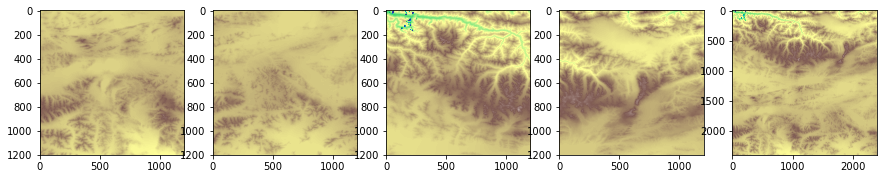

In [5]:
plt.figure(figsize=(15,3))
cmap = plt.cm.terrain
plt.subplot(1,5,1)
plt.imshow(tandem_1, cmap=cmap, clim=[1000, 8000], alpha=1)
plt.subplot(1,5,2)
plt.imshow(tandem_2, cmap=cmap, clim=[1000, 8000], alpha=1)
plt.subplot(1,5,3)
plt.imshow(tandem_3, cmap=cmap, clim=[1000, 8000], alpha=1)
plt.subplot(1,5,4)
plt.imshow(tandem_4, cmap=cmap, clim=[1000, 8000], alpha=1)
plt.subplot(1,5,5)
plt.imshow(tandem_mosaic, cmap=cmap, clim=[1000, 8000], alpha=1)


### Subseting

In [6]:
path_tandem_wkunlun = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun.tif'
wkunlun_bounds = (80.118, 81.941, 34.907, 35.852)     # rgi13_05
tandem_wkunlun = crop_to_extent(path_img=path_tandem_mosaic, \
                    extent_target=wkunlun_bounds, path_save=path_tandem_wkunlun)


### Check subseting

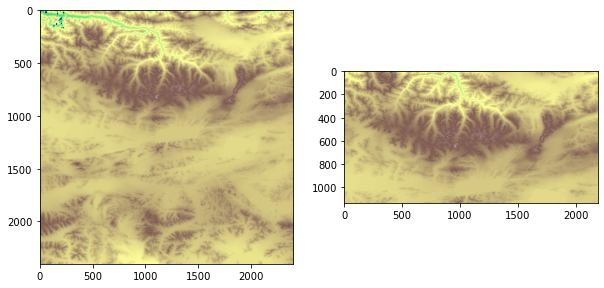

In [7]:
tandem_mosaic, tandem_mosaic_info = readTiff(path_tandem_mosaic)
tandem_wkunlun, tandem_wkunlun_info = readTiff(path_tandem_wkunlun)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(tandem_mosaic, cmap=cmap, clim=[1000, 8000], alpha=1)
plt.subplot(1,2,2)
plt.imshow(tandem_wkunlun, cmap=cmap, clim=[1000, 8000], alpha=1)



In [41]:
path_tandem = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun.tif'
path_tandem_upsam = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam.tif'
!gdal_translate -outsize 300% 300% -r bilinear $path_tandem $path_tandem_upsam


Input file size is 2188, 1134
0...10...20...30...40...50...60...70...80...90...100 - done.


In [45]:
tandem, tandem_info = readTiff(path_tandem)
tandem_upsam, tandem_upsam_info = readTiff(path_tandem_upsam)
print(tandem.shape)
print(tandem_upsam.shape)


(1134, 2188)
(3402, 6564)


### 2. Processing for srtm dem image

### 2.1 mosaic for srtml3 data

In [8]:
paths_srtml3 = glob.glob(config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/*')
path_srtml3_mosaic = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_mosaic.tif'
# print(paths_srtml3)


In [11]:
out_path_tmp = 'out.tif'

for i, path_srtml3 in enumerate(paths_srtml3):
    print('merge ->', path_srtml3.split('/')[-1])
    if i == 0:
      !gdal_merge.py -init 0 -o $path_srtml3_mosaic $path_srtml3 $path_srtml3
      !mv $path_srtml3_mosaic $out_path_tmp   # rename 
    else:
      !gdal_merge.py -init 0 -o $path_srtml3_mosaic $out_path_tmp $path_srtml3
      if i <len(paths_srtml3)-1:
        !mv $path_srtml3_mosaic $out_path_tmp  # rename




merge -> n35_e080_3arc_v1.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> n34_e080_3arc_v1.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> n35_e081_3arc_v1.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
merge -> n34_e081_3arc_v1.tif
0...10...20...30...40...50...60...70...80...90...100 - done.


In [16]:
### subseting
path_srtml3_wkunlun = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wkunlun.tif'
wkunlun_bounds = (80.118, 81.941, 34.907, 35.852)     # rgi13_05
srtml3_wkunlun = crop_to_extent(path_img=path_srtml3_mosaic, \
                    extent_target=wkunlun_bounds, path_save=path_srtml3_wkunlun)



### 2.2. datum Transform for rstm-c dem image


In [17]:
### 1.1 vertical datum
### 1.1.1. wgs84 to wgs84/egm2008
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +no_def" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/TanDem90_StudyArea_resize_resam.tif data/dem/TanDem90_StudyArea_resize_resam_egm2008.tif
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +no_def" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/SRTM_X_DEM.tif data/dem/SRTM_X_egm2008.tif

# !gdalwarp -overwrite -s_srs EPSG:4326 -t_srs EPSG:4326+3855 data/dem/SRTM_X_DEM.tif data/dem/SRTM_X_egm2008.tif
### 1.1.2 wgs84/egm96 to egm2008
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +geoidgrids=egm96_15.gtx" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/SRTMGL1_StudyArea.tif data/dem/SRTMGL1_StudyArea_egm2008.tif

# 1.1.3. wgs84/egm96 to wgs84
# path_srtm_c = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun.tif'
# path_srtm_c_wgs84V = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V.tif'
# path_srtm_l3 = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wkunlun.tif'
# path_srtm_l3_wgs84V = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V.tif'
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +geoidgrids=egm96_15.gtx" -t_srs "+proj=longlat +datum=WGS84 +no_defs" $path_srtm_l3 $path_srtm_l3_wgs84V


Creating output file that is 2188P x 1134L.
Processing /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/srtm-c/SRTMGL3_v1/srtml3_wkunlun.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [18]:
## 1.2 horizontal datum
# ### srtm
# path_srtm_c_wgs84V = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V.tif'
# path_srtm_save = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V_utm.tif'
# path_srtml3_wgs84V = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V.tif'
# path_srtml3_wgs84V_save = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V_utm.tif'
# path_srtm_x = config.root_proj + '/data/dem/srtm-x/srtm_x.tif'
# path_srtm_x_save = config.root_proj + '/data/dem/srtm-x/srtm_x_utm.tif'
# !gdalwarp -t_srs '+proj=utm +zone=44 +datum=WGS84' -overwrite -r bilinear $path_srtm_x $path_srtm_x_out
# !gdalwarp -t_srs '+proj=utm +zone=44 +datum=WGS84' -overwrite -r bilinear $path_srtml3_wgs84V $path_srtml3_wgs84V_save
### tandem
# path_tandem = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam.tif'
# path_tandem_out = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam_utm.tif'
# !gdalwarp -t_srs '+proj=utm +zone=44 +datum=WGS84' -overwrite -r bilinear $path_tandem $path_tandem_out


Creating output file that is 2095P x 1323L.
Processing /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


### Check reprojected dem


In [19]:
# path_srtm_c = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V.tif'
# path_srtm_c_utm = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V_utm.tif'
path_srtm_c = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V.tif'
path_srtm_c_utm = config.root_proj + '/data/dem/srtm-c/SRTMGL3_v1/srtml3_wgs84V_utm.tif'
path_tandem = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam.tif'
path_tandem_utm = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam_utm.tif'

tandem, tandem_info = readTiff(path_tandem)
tandem_utm, tandem_utm_info = readTiff(path_tandem_utm)
srtm_c, rstm_c_info = readTiff(path_srtm_c)
srtm_c_utm, rstm_c_utm_info = readTiff(path_srtm_c_utm)


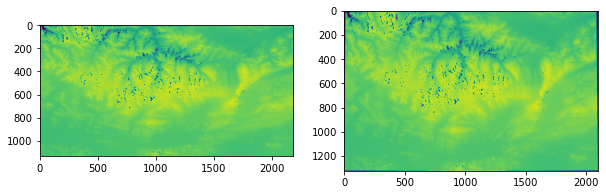

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(srtm_c, vmax=7000, vmin=0)
plt.subplot(1,2,2)
plt.imshow(srtm_c_utm, vmax=7000, vmin=0)


### 3. dem image alignment (base image: srtm-c)

In [51]:
path_srtm_c = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V_utm.tif'
path_tandem_wkunlun = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam_utm.tif'
path_tandem_resize = config.root_proj + '/data/dem/tandem-x/tandem_wkunlun_upsam_utm_align.tif'



In [52]:
img_srtm_c, img_srtm_c_info = readTiff(path_srtm_c)
img_tandem, img_tandem_info = readTiff(path_tandem_wkunlun)
print('rstm shape:',   img_srtm_c.shape, 'extent:', img_srtm_c_info['geoextent'])
print('tandem shape:', img_tandem.shape, 'extent',  img_tandem_info['geoextent'])


rstm shape: (3968, 6282) extent: (419391.6113126002, 585919.5646432166, 3862794.8176520756, 3967981.5287020416)
tandem shape: (3969, 6283) extent (419423.97743896896, 585957.2951600878, 3862742.1192589006, 3967941.9820688833)


In [53]:
extent_srtm = img_srtm_c_info['geoextent']
size_srtm = [img_srtm_c_info['row'], img_srtm_c_info['col']]
tandem_resize = crop_to_extent(path_img=path_tandem_wkunlun, \
                    extent_target=extent_srtm, size_target=size_srtm, path_save=path_tandem_resize)
tandem_resize.shape


(3968, 6282)